In [2]:
# 👩‍💻 KNN Classification on Social Network Ads dataset
# ----------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [4]:
df = pd.read_csv('scl.csv')

In [6]:
print("Shape:", df.shape)
display(df.head())


Shape: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
# ---- 2️⃣ Data Preprocessing ----
# Select useful features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# ---- 3️⃣ Split into Train and Test ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
# ---- 4️⃣ Feature Scaling ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# ---- 5️⃣ Train KNN Model ----
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [14]:
# ---- 6️⃣ Predict ----
y_pred = knn.predict(X_test_scaled)

In [16]:
# ---- 7️⃣ Evaluation Metrics ----
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
error_rate = 1 - acc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("📊 Evaluation Results")
print("----------------------")
print("Confusion Matrix:\n", cm)
print(f"\nAccuracy: {acc:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

📊 Evaluation Results
----------------------
Confusion Matrix:
 [[59  4]
 [ 3 34]]

Accuracy: 0.9300
Error Rate: 0.0700
Precision: 0.8947
Recall: 0.9189


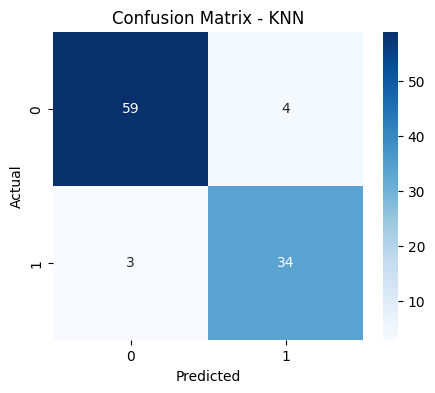

In [18]:
# ---- 8️⃣ Confusion Matrix Visualization ----
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


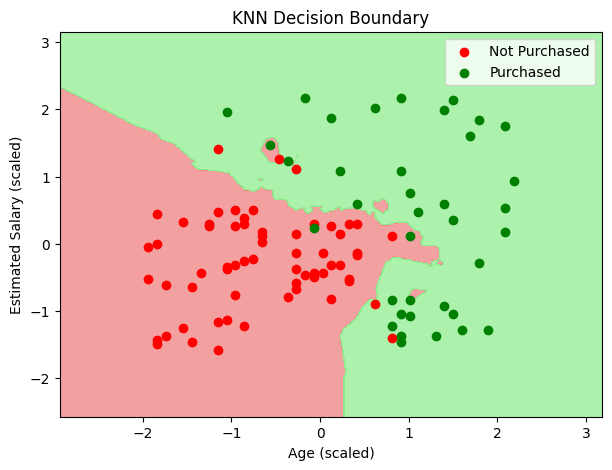

In [20]:
# ---- 9️⃣ Decision Boundary (Optional Visualization) ----
# Works best with 2 features (Age, Salary)
from matplotlib.colors import ListedColormap

X_set, y_set = X_test_scaled, y_test.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(7,5))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightcoral', 'lightgreen')))
plt.scatter(X_set[y_set==0, 0], X_set[y_set==0, 1], c='red', label='Not Purchased')
plt.scatter(X_set[y_set==1, 0], X_set[y_set==1, 1], c='green', label='Purchased')
plt.title('KNN Decision Boundary')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()